Implement BWO with 1-15 range

In [1]:
pip install bwo

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install landscapes

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [1]:
from bwo import minimize
from landscapes.single_objective import sphere
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from matplotlib import pyplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import os

In [19]:
n_estimator = np.arange(1, 16, 1).tolist()
#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
fbest, xbest = minimize(sphere , x0 = n_estimator, disp = True, maxiter = 3000)

> ITER:  1 | GBEST: 1191.984830
> ITER:  2 | GBEST: 1191.984830
> ITER:  3 | GBEST: 1159.526139
> ITER:  4 | GBEST: 1126.239254
> ITER:  5 | GBEST: 1056.669208
> ITER:  6 | GBEST: 1044.835496
> ITER:  7 | GBEST: 1044.835496
> ITER:  8 | GBEST: 1044.835496
> ITER:  9 | GBEST: 1043.777890
> ITER: 10 | GBEST: 1043.681583
> ITER: 11 | GBEST: 1043.661280
> ITER: 12 | GBEST: 1043.661263
> ITER: 13 | GBEST: 1042.489096
> ITER: 14 | GBEST: 1042.488872
> ITER: 15 | GBEST: 1042.488871
> ITER: 16 | GBEST: 1031.357962
> ITER: 17 | GBEST: 1031.348915
> ITER: 18 | GBEST: 1031.348845
> ITER: 19 | GBEST: 1030.002399
> ITER: 20 | GBEST: 1026.256236
> ITER: 21 | GBEST: 1026.256192
> ITER: 22 | GBEST: 1026.256192
> ITER: 23 | GBEST: 989.059360
> ITER: 24 | GBEST: 983.666476
> ITER: 25 | GBEST: 981.642868
> ITER: 26 | GBEST: 981.641962
> ITER: 27 | GBEST: 972.988394
> ITER: 28 | GBEST: 970.577101
> ITER: 29 | GBEST: 970.565814
> ITER: 30 | GBEST: 970.565814
> ITER: 31 | GBEST: 969.561073
> ITER: 32 | GBES

In [23]:
fbest, xbest

(921.9120444725163,
 [7.8396940596795375,
  7.8396940573448735,
  7.839694059603719,
  7.839694060223071,
  7.839694058943495,
  7.839694058457065,
  7.839694060534438,
  7.839694060663307,
  7.839694062444503,
  7.839694065293113,
  7.839694065630045,
  7.839694059626263,
  7.839694060611206,
  7.839694060488576,
  7.839694060439793])

Implement K-Means Clustering with output of BWO

In [6]:
df = pd.read_csv('D:\A_FYP\Dataset/GSE10072_clean.csv')


In [7]:
kmeans = KMeans(n_clusters=8) 
clusterk = kmeans.fit_predict(df)

c:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


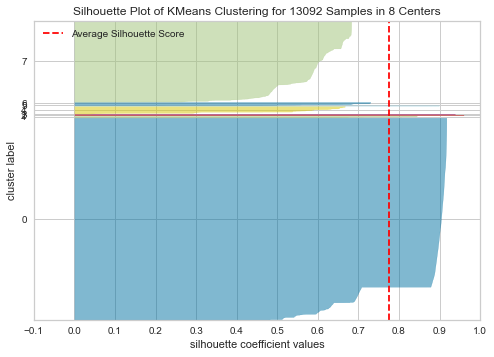

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13092 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', figsize=(10, 30))
visualizer.fit(df) 
visualizer.show()

In [9]:
#get the number of features in each cluster
import numpy as np
# cluster assignments
labels = kmeans.labels_
# get the number of data in each cluster
cluster_counts = np.bincount(labels)
cluster_counts

array([8900,   85,   26,   31,  332,   29,  132, 3557], dtype=int64)

In [10]:
# Get the average silhouette score for each cluster
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df, clusterk)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.7762427903731605


In [11]:
#sample_silhouette_values is the silhouette index for each features
sample_silhouette_values = silhouette_samples(df, clusterk)

In [12]:
# calculate the average silhouette score for each cluster
cluster_silhouette_avgs = []
for i in range(8):
    cluster_silhouette_avgs.append(
        np.mean(sample_silhouette_values[clusterk == i])
    )

# print the average silhouette score for each cluster
for i, avg_score in enumerate(cluster_silhouette_avgs):
    print(f"Cluster {i}: {avg_score}")

Cluster 0: 0.8612311356290365
Cluster 1: 0.759785419499049
Cluster 2: 0.922356205103483
Cluster 3: 0.8720514510003542
Cluster 4: 0.508495142228759
Cluster 5: 0.8430780281333045
Cluster 6: 0.6611198674585995
Cluster 7: 0.5908010725205292


In [13]:
best_cluster = clusterk[sample_silhouette_values.argmax()]

In [14]:
# Extract the data points in the best cluster
best_cluster_data = df[clusterk == best_cluster]
print("Best_cluster_data", best_cluster_data)

Best_cluster_data               ID  GSM254625  GSM254626  GSM254627  GSM254628  GSM254629  \
1507   105372824   0.745014   0.815789   0.342858   0.723570   0.903161   
4718   105375355  -0.390158   1.492569  -1.341308   1.017366  -1.290098   
5031   105379490  -0.637505  -0.709478  -0.393741  -0.603324  -0.466219   
5984   105374985  -2.012750  -1.994216  -2.172784  -2.015554  -2.042408   
6294   104909134  -0.899854  -0.866865  -0.689065  -0.853041  -0.735563   
6624   105371501  -1.060394  -0.911615  -0.919493  -0.881371  -0.686688   
7304   105374258  -1.365127  -1.247374  -1.367434  -1.278819  -1.285785   
7940   105378973  -0.330696  -0.061580  -0.549744  -0.140680  -0.137452   
8668   105370752  -0.730420  -0.729291  -0.582197  -0.553457  -0.652817   
8720   105374995  -1.684424  -1.672472  -1.669469  -1.707906  -1.660372   
9051   105377443  -1.447428  -1.414829  -1.495140  -1.358547  -1.414558   
9067   105370624  -0.803342  -0.907071  -0.920007  -0.712349  -0.752174   
9151   

In [15]:
print("Best_cluster", best_cluster)

Best_cluster 2


In [16]:
#extract all data except the data within the best_cluster
other_clusters_data = df[clusterk != best_cluster]
print("Other cluster: ", other_clusters_data)

Other cluster:                ID  GSM254625  GSM254626  GSM254627  GSM254628  GSM254629  \
0            780   1.898671   1.449268   1.755369   1.340386   1.964219   
1           5982  -0.368385  -0.441749  -0.041515  -0.570606  -0.448033   
2           3310   0.678290   0.315025   0.328840   0.349755   0.193391   
3           7849  -0.423386  -0.394947  -0.173142  -0.339226  -0.283835   
4           2978  -0.847577  -0.821560  -0.698266  -0.713250  -0.760346   
...          ...        ...        ...        ...        ...        ...   
13087     389677  -1.407397  -1.010206  -1.157060  -1.411152  -1.431821   
13088  100287013   0.153237   0.353378   0.820909   0.356488   1.053646   
13089     388796  -0.028032  -0.063019   0.832905   0.158563   0.040888   
13090  100505915  -1.218212  -1.155706  -1.286579  -1.229424  -1.140574   
13091      79716  -0.487850  -0.637523  -0.594855  -0.685952  -0.553327   

       GSM254630  GSM254631  GSM254632  GSM254633  ...  GSM254722  GSM254723  \
0  

In [17]:
best_cluster = best_cluster_data.T
best_cluster

,1507,4718,5031,5984,6294,6624,7304,7940,8668,8720,...,9405,9523,9643,11771,11922,12022,12189,12988,12996,13055
ID,1.053728e+08,1.053754e+08,1.053795e+08,1.053750e+08,1.049091e+08,1.053715e+08,1.053743e+08,1.053790e+08,1.053708e+08,1.053750e+08,...,1.053795e+08,1.066996e+08,1.053704e+08,1.053768e+08,1.053698e+08,1.053762e+08,1.053743e+08,1.053726e+08,1.053761e+08,1.053713e+08
GSM254625,7.450142e-01,-3.901576e-01,-6.375050e-01,-2.012750e+00,-8.998536e-01,-1.060394e+00,-1.365127e+00,-3.306961e-01,-7.304197e-01,-1.684424e+00,...,-1.446340e+00,-1.721205e+00,1.878174e+00,-1.381202e+00,4.161330e-01,-5.596405e-01,-1.419616e+00,-1.210999e+00,-7.672132e-01,3.010415e-01
GSM254626,8.157889e-01,1.492569e+00,-7.094785e-01,-1.994216e+00,-8.668651e-01,-9.116146e-01,-1.247374e+00,-6.157982e-02,-7.292910e-01,-1.672472e+00,...,-1.459924e+00,-1.767453e+00,1.443947e+00,-1.393416e+00,4.891527e-01,-4.055822e-01,-1.309654e+00,-1.195180e+00,-6.293318e-01,4.499665e-01
GSM254627,3.428575e-01,-1.341308e+00,-3.937407e-01,-2.172784e+00,-6.890650e-01,-9.194934e-01,-1.367434e+00,-5.497437e-01,-5.821973e-01,-1.669469e+00,...,-1.439273e+00,-1.789171e+00,1.390619e+00,-1.207207e+00,8.570279e-01,-3.021704e-01,-1.379474e+00,-1.286168e+00,-4.360998e-01,6.469219e-01
GSM254628,7.235703e-01,1.017366e+00,-6.033241e-01,-2.015554e+00,-8.530409e-01,-8.813714e-01,-1.278819e+00,-1.406795e-01,-5.534575e-01,-1.707906e+00,...,-1.521222e+00,-1.753643e+00,1.282879e+00,-1.315904e+00,5.964640e-01,-4.570745e-01,-1.321552e+00,-1.165740e+00,-5.683020e-01,5.357670e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM254727,9.458140e-01,6.188866e-01,-8.130012e-01,-1.932829e+00,-8.030860e-01,-9.159218e-01,-1.390840e+00,-8.226025e-01,-6.329848e-01,-1.620575e+00,...,-1.357749e+00,-1.608158e+00,1.205313e+00,-1.335595e+00,5.478291e-01,-4.987701e-01,-1.362901e+00,-1.195211e+00,-5.521280e-01,6.733010e-01
GSM254728,7.432660e-01,-1.289266e+00,-6.054435e-01,-1.993667e+00,-7.719022e-01,-9.693265e-01,-1.418883e+00,-3.965955e-01,-7.905730e-01,-1.681643e+00,...,-1.495355e+00,-1.596985e+00,1.464129e+00,-9.692482e-01,6.457073e-01,-4.350349e-01,-1.249475e+00,-1.380517e+00,-5.976261e-01,1.007696e+00
GSM254729,8.856345e-01,-4.381815e-01,-6.014021e-01,-2.187982e+00,-6.955121e-01,-7.550704e-01,-1.321688e+00,-1.948922e-01,-7.188622e-01,-1.660096e+00,...,-1.681650e+00,-1.816328e+00,1.424044e+00,-1.409609e+00,7.119729e-01,-4.674657e-01,-1.184285e+00,-1.054339e+00,-5.265027e-01,6.000789e-01
GSM254730,8.791629e-01,1.412244e+00,-7.150039e-01,-2.038604e+00,-8.075818e-01,-8.639704e-01,-1.321642e+00,-4.911923e-01,-7.083181e-01,-1.679049e+00,...,-1.399466e+00,-1.696873e+00,1.531349e+00,-1.299866e+00,6.311184e-01,-4.170476e-01,-1.311876e+00,-1.361738e+00,-3.745611e-01,5.368306e-01


In [18]:
other_clusters = other_clusters_data.T
other_clusters

,0,1,2,3,4,5,6,7,8,9,...,13082,13083,13084,13085,13086,13087,13088,13089,13090,13091
ID,780.000000,5982.000000,3310.000000,7849.000000,2978.000000,7318.000000,7067.000000,11099.000000,6352.000000,1571.000000,...,23446.000000,23704.000000,8484.000000,1.005327e+08,1.005280e+08,389677.000000,1.002870e+08,388796.000000,1.005059e+08,79716.000000
GSM254625,1.898671,-0.368385,0.678290,-0.423386,-0.847577,0.721174,-0.348723,-0.930030,0.713855,-1.094222,...,-1.462615,-1.081022,0.517396,1.893423e+00,3.454909e-01,-1.407397,1.532367e-01,-0.028032,-1.218212e+00,-0.487850
GSM254626,1.449268,-0.441749,0.315025,-0.394947,-0.821560,1.084779,-0.266668,-0.755910,0.689397,-0.978480,...,-0.973605,-1.473412,0.578686,2.073962e+00,3.869678e-01,-1.010206,3.533776e-01,-0.063019,-1.155706e+00,-0.637523
GSM254627,1.755369,-0.041515,0.328840,-0.173142,-0.698266,0.531516,-0.285876,-0.999628,0.915363,-0.976633,...,-1.600144,-1.291394,0.948971,1.708380e+00,4.084195e-01,-1.157060,8.209086e-01,0.832905,-1.286579e+00,-0.594855
GSM254628,1.340386,-0.570606,0.349755,-0.339226,-0.713250,0.837750,-0.237234,-0.595096,0.698606,-0.975521,...,-1.200651,-1.128507,0.694956,1.906003e+00,1.960564e-01,-1.411152,3.564884e-01,0.158563,-1.229424e+00,-0.685952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM254727,1.505237,-0.538612,0.405700,-0.339959,-0.888946,1.062560,-0.277129,-0.736088,0.603559,-1.072892,...,-1.421645,-0.983253,0.595156,2.102918e+00,3.965322e-01,-1.650565,3.837932e-01,0.122339,-9.991314e-01,-0.206586
GSM254728,1.933142,-0.467448,0.542945,-0.278757,-0.906755,0.803624,-0.290167,-1.000259,0.585652,-1.009426,...,-1.271277,-1.184415,0.643920,2.083300e+00,4.181853e-01,-1.344914,6.498129e-01,0.229183,-9.840862e-01,-0.298949
GSM254729,2.013082,-0.588425,0.304993,-0.101920,-0.800061,0.843256,-0.211900,-0.942982,0.520744,-0.934004,...,-1.477568,-1.124857,0.791865,1.791717e+00,5.336580e-01,-1.073950,4.302366e-01,0.242861,-1.066355e+00,-0.311320
GSM254730,1.496933,-0.564582,0.631146,-0.237845,-0.776429,1.229708,-0.192228,-0.771241,0.612194,-0.977251,...,-1.280030,-1.375831,0.618534,2.290472e+00,3.105577e-01,-1.434088,4.116840e-01,0.179704,-1.081505e+00,-0.321269


In [19]:
#best_cluster.to_csv('D:\A_FYP\Dataset/gse10072_bestCluster.csv', index=True)

In [20]:
#other_clusters.to_csv('D:\A_FYP\Dataset/gse10072_otherCluster.csv', index=True)

Random Forest Classification for Best Cluster

In [75]:
best_cluster = pd.read_csv('D:\A_FYP\Dataset/gse10072_bestCluster.csv')

In [76]:
best_cluster = best_cluster.iloc[:,1:]
best_cluster.head()

,105372824,105375355,105379490,105374985,104909134,105371501,105374258,105378973,105370752,105374995,...,106699570,105370447,105376839,105369820,105376204,105374297,105372602,105376064,105371267,class
0,0.745014,-0.390158,-0.637505,-2.012750,-0.899854,-1.060394,-1.365127,-0.330696,-0.730420,-1.684424,...,-1.721205,1.878174,-1.381202,0.416133,-0.559641,-1.419616,-1.210999,-0.767213,0.301041,1
1,0.815789,1.492569,-0.709478,-1.994216,-0.866865,-0.911615,-1.247374,-0.061580,-0.729291,-1.672472,...,-1.767453,1.443947,-1.393416,0.489153,-0.405582,-1.309654,-1.195180,-0.629332,0.449967,0
2,0.342858,-1.341308,-0.393741,-2.172784,-0.689065,-0.919493,-1.367434,-0.549744,-0.582197,-1.669469,...,-1.789171,1.390619,-1.207207,0.857028,-0.302170,-1.379474,-1.286168,-0.436100,0.646922,1
3,0.723570,1.017366,-0.603324,-2.015554,-0.853041,-0.881371,-1.278819,-0.140680,-0.553457,-1.707906,...,-1.753643,1.282879,-1.315904,0.596464,-0.457074,-1.321552,-1.165740,-0.568302,0.535767,0
4,0.903161,-1.290098,-0.466219,-2.042408,-0.735563,-0.686688,-1.285785,-0.137452,-0.652817,-1.660372,...,-1.680462,1.257081,-1.289915,0.620272,-0.365656,-1.440544,-1.181297,-0.504717,1.300969,1


In [77]:
best_target = best_cluster["class"]
best_predictor = best_cluster.drop("class", axis=1)

In [78]:
lrf_X_train,lrf_X_test,lrf_Y_train,lrf_Y_test = train_test_split(best_predictor,best_target,test_size=0.3)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

rf = RandomForestClassifier()
rf.fit(lrf_X_train, lrf_Y_train)
Y_pred_rf = rf.predict(lrf_X_test)
accuracy = round(accuracy_score(lrf_Y_test,Y_pred_rf)*100,2)
cm = metrics.confusion_matrix(lrf_Y_test, Y_pred_rf)

In [80]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))

sensivity =round(conf_sensitivity*100,2)
specificty = round(conf_specificity*100,2)

print("accuracy: ",accuracy)
print("sensivity: ", sensivity)
print("specificty: ", specificty)

accuracy:  93.94
sensivity:  95.0
specificty:  92.31


Random Forest Feature Selection for the Other Cluster

In [159]:
other_cluster = pd.read_csv('D:\A_FYP\Dataset/gse10072_otherCluster.csv')

In [160]:
other_cluster_set = other_cluster.iloc[:,1:]
target = other_cluster_set["class"]
predictor = other_cluster_set.drop("class", axis=1)

In [161]:
lx_train, lx_test, ly_train, ly_test = train_test_split(predictor,target,test_size=0.3)

In [162]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# use selectFromModel object from sklearn to automatically select the features.
# SelectFromModel select those features which importance is greater than the mean importance of all the features by default, 
#but we can alter this threshold if we want.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(predictor, target)

SelectFromModel(estimator=RandomForestClassifier())

In [163]:
# use get_support method on the fitted model.
# return an array of boolean values. 
# True for the features whose importance is > mean importance and False for the rest.
sel.get_support()

# make a list and count the selected features.
selected_feat= lx_train.columns[(sel.get_support())]
len(selected_feat)

212

In [172]:
selected_feat

Index(['2079', '23450', '3313', '23022', '2023', '3611', '4831', '847', '5412',
       '9320',
       ...
       '29091', '55130', '55079', '79684', '81555', '55620', '54434', '400961',
       '6853', '284361'],
      dtype='object', length=212)

In [164]:
selected_feat_list = pd.read_csv('D:\A_FYP\Dataset/gse10072_otherCluster.csv', usecols=selected_feat)

In [165]:
get_class=["class"]
get_col_class = pd.read_csv('D:\A_FYP\Dataset/gse10072_otherCluster.csv', usecols=get_class)
#get_col_class

In [166]:
selected_feat_list["class"] = get_col_class
selected_feat_list_df = pd.DataFrame(selected_feat_list)
selected_feat_list_df

,2079,23450,3313,23022,2023,3611,4831,847,5412,9320,...,55130,55079,79684,81555,55620,54434,400961,6853,284361,class
0,2.178039,0.310254,0.660358,1.385062,1.919222,1.773215,2.335208,0.349616,0.892999,1.508915,...,-0.534903,-1.753859,-0.089212,0.270410,0.785553,0.721696,-0.787737,0.041940,-1.064524,1
1,2.037055,0.189547,0.611341,1.619216,1.320376,1.953833,1.876368,0.936224,1.326088,1.366570,...,-0.343785,-1.733897,0.037171,0.084365,0.056772,0.792255,-0.639673,0.047351,-0.978175,0
2,2.961885,0.122253,1.091955,0.757020,2.335523,1.866615,2.396704,0.059087,0.308952,1.183414,...,-0.211413,-1.726582,-0.554038,-0.121848,0.223481,0.804910,-0.407055,0.364781,-1.026939,1
3,2.016346,0.189294,0.644227,1.393645,1.465268,2.024388,1.896184,0.890179,1.472110,1.304423,...,-0.371464,-1.759105,-0.372795,0.101301,0.109175,0.752766,-0.731408,0.137205,-1.027218,0
4,2.318207,0.451570,1.163973,0.674171,1.836269,1.887875,2.108137,0.574035,1.285587,1.265352,...,-0.286416,-1.688303,-0.131634,0.465452,0.573956,0.698541,-0.519978,0.269728,-0.970657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2.062393,0.173114,0.689662,1.595169,1.253059,2.067513,2.125296,0.724710,1.042521,1.267826,...,-0.478439,-1.841334,-0.323900,-0.052379,0.094268,0.981928,-0.778513,0.027757,-1.021742,0
103,2.232046,0.226751,0.744764,1.410844,2.008238,1.834095,2.475127,0.155950,0.917882,1.570079,...,-0.405016,-1.885553,-0.506665,0.502558,0.799634,0.764400,-0.637350,0.080634,-0.957790,1
104,2.313741,0.252626,1.039947,1.062453,1.994572,1.901571,2.412135,0.335747,0.778835,1.109774,...,-0.245621,-1.782152,-0.296756,-0.025340,0.523136,0.655702,-0.735819,0.169942,-0.928193,1
105,1.963374,0.167000,0.625744,1.379459,1.205900,2.178888,2.008224,0.765897,1.093463,1.291908,...,-0.435345,-1.762081,0.163127,-0.288500,0.223612,0.939751,-0.623126,0.201463,-0.968541,0


Random Forest Classification for the selected features from Other cluster

In [167]:
rf_target = selected_feat_list_df["class"]

In [168]:
rf_predictor = selected_feat_list_df.drop("class", axis=1)

In [169]:
lrf_X_train,lrf_X_test,lrf_Y_train,lrf_Y_test = train_test_split(rf_predictor,rf_target,test_size=0.3)

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

rf = RandomForestClassifier()
rf.fit(lrf_X_train, lrf_Y_train)
Y_pred_rf = rf.predict(lrf_X_test)
accuracy = round(accuracy_score(lrf_Y_test,Y_pred_rf)*100,2)
cm = metrics.confusion_matrix(lrf_Y_test, Y_pred_rf)

In [171]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))

sensivity =round(conf_sensitivity*100,2)
specificty = round(conf_specificity*100,2)

print("accuracy: ",accuracy)
print("sensivity: ", sensivity)
print("specificty: ", specificty)

accuracy:  100.0
sensivity:  100.0
specificty:  100.0
